### Classification in Neural Network
**Classification** is identifying which set of categories an observation belons to. Classification can be:
* Binary Classification: refers to predicting one of two classes, e.g. spam-ham classification
* Multi-Class Classification: refers to predicting one of more than two classes, e.g. predicting an image is of dog, cat or bird
* Multi-label Classification: where one data belongs to multiple classes. e.g. A movie can belongs to different genre like comedy, suspence, romance.

Let's start with some sample data from the Scikit Learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.03, random_state=13)

In [2]:
df = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
df.head()

,X0,X1,label
0,1.970105,0.170778,1
1,-1.005016,0.273969,0
2,-0.360586,0.916384,0
3,-0.930688,0.408747,0
4,1.679520,-0.250213,1


In [3]:
# Check out the different labels
df.label.value_counts()

1    500
0    500
Name: label, dtype: int64

It's binary because we are only having two labels 0 and 1

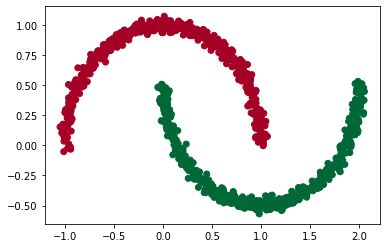

In [4]:
# Visualize with a plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn);

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

### Create a Model

In [6]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(13)

# Create a Model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['Accuracy'])

# Fit the model
model1.fit(X, y, epochs=15)

Epoch 1/15
32/32 [==============================] - 1s 3ms/step - loss: 1.1075 - Accuracy: 0.8500
Epoch 2/15
32/32 [==============================] - 0s 3ms/step - loss: 0.5402 - Accuracy: 0.8730
Epoch 3/15
32/32 [==============================] - 0s 3ms/step - loss: 0.2302 - Accuracy: 0.8760
Epoch 4/15
32/32 [==============================] - 0s 3ms/step - loss: 0.2253 - Accuracy: 0.8780
Epoch 5/15
32/32 [==============================] - 0s 3ms/step - loss: 0.2237 - Accuracy: 0.8820
Epoch 6/15
32/32 [==============================] - 0s 3ms/step - loss: 0.2229 - Accuracy: 0.8850
Epoch 7/15
32/32 [==============================] - 0s 3ms/step - loss: 0.2225 - Accuracy: 0.8860
Epoch 8/15
32/32 [==============================] - 0s 3ms/step - loss: 0.2227 - Accuracy: 0.8870
Epoch 9/15
32/32 [==============================] - 0s 3ms/step - loss: 0.2225 - Accuracy: 0.8880
Epoch 10/15
32/32 [==============================] - 0s 3ms/step - loss: 0.2224 - Accuracy: 0.8840
Epoch 11/15
32/32 [

In [7]:
model1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2220 - Accuracy: 0.8880


[0.22204293310642242, 0.8880000114440918]

We can see that our model is performing quite well, but let's see how to improve the Model's performance. Some of the common ways to improve Model's Performance:
* Adding Layers
* Increase the no of hidden units
* Change the Activation function
* Change the Optimizer
* Change the learning rate
* Fitting on more data
* Run for more Epochs

In [8]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 

((800, 2), (200, 2))

During Compilation of Model we use:
* **Loss function** —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* **Optimizer** —This is how the model is updated based on the data it sees and its loss function.
* **Metrics** —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [9]:
# Set random seed
tf.random.set_seed(13)

# Create a Model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the Model
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['Accuracy'])

# Fit the model
model2.fit(X_train, y_train, epochs=10, verbose=2)

Epoch 1/10
25/25 - 1s - loss: 0.5707 - Accuracy: 0.7400 - 977ms/epoch - 39ms/step
Epoch 2/10
25/25 - 0s - loss: 0.3730 - Accuracy: 0.8450 - 148ms/epoch - 6ms/step
Epoch 3/10
25/25 - 0s - loss: 0.2841 - Accuracy: 0.8612 - 106ms/epoch - 4ms/step
Epoch 4/10
25/25 - 0s - loss: 0.2517 - Accuracy: 0.8775 - 130ms/epoch - 5ms/step
Epoch 5/10
25/25 - 0s - loss: 0.2353 - Accuracy: 0.8875 - 122ms/epoch - 5ms/step
Epoch 6/10
25/25 - 0s - loss: 0.2255 - Accuracy: 0.8888 - 91ms/epoch - 4ms/step
Epoch 7/10
25/25 - 0s - loss: 0.2224 - Accuracy: 0.8888 - 54ms/epoch - 2ms/step
Epoch 8/10
25/25 - 0s - loss: 0.2133 - Accuracy: 0.8888 - 55ms/epoch - 2ms/step
Epoch 9/10
25/25 - 0s - loss: 0.2102 - Accuracy: 0.8888 - 52ms/epoch - 2ms/step
Epoch 10/10
25/25 - 0s - loss: 0.2086 - Accuracy: 0.8913 - 53ms/epoch - 2ms/step


In [10]:
loss, accuracy = model2.evaluate(X_test, y_test)
loss, accuracy

7/7 [==============================] - 0s 3ms/step - loss: 0.1990 - Accuracy: 0.8900


(0.19900937378406525, 0.8899999856948853)

We can see that our Model's Accuracy is increased by 1% then previous one

### Classification Evaluation Metrics
| **Metrics/Evaluation** | **Definition** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many your model predicted correct? e.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| Confusion matrix  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay

In [12]:
y_pred = model2.predict(X_test)
tf.round(y_pred)[:10]

7/7 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [13]:
confusion_matrix(y_test, tf.round(y_pred))

array([[90,  9],
       [13, 88]])

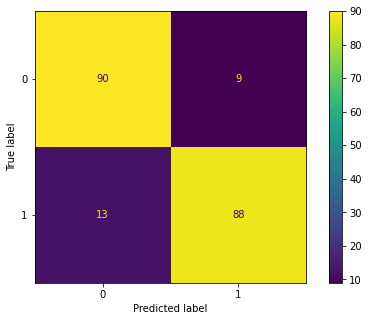

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, tf.round(y_pred)),
)

cmp.plot(ax=ax);

### Multiclass Classification on MNIST Dataset

In [15]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [16]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [17]:
# Training example
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [18]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

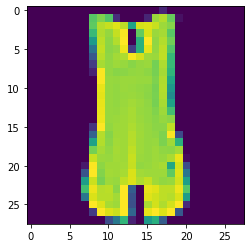

In [19]:
# Plot a sample
import matplotlib.pyplot as plt
plt.imshow(train_data[4])

In [20]:
train_labels[4]

0

In [21]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',	'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_name)

10

Text(0.5, 1.0, 'T-shirt/top')

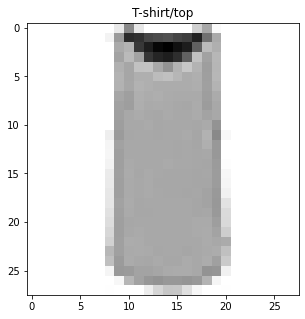

In [22]:
# Let's visualize an example
index_no = 2
plt.figure(figsize=(5,5))
plt.imshow(train_data[index_no], cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_no]])

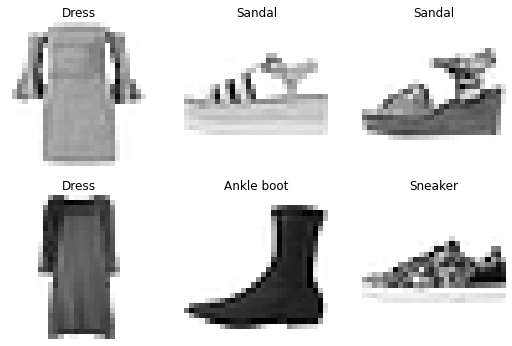

In [23]:
# Plot multiple random images of fashion MNIST
import random
n=3
plt.figure(figsize=(9, 9))
for i in range(6):
  ax = plt.subplot(n, n, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False)

Let's build our first multi-class classification model. In this Model we have to make few changes:
* Input Shape will be 28x28 tensor since the height and width of image is 28 
* Output shape will be 10 since we have 10 classes
* Activation function will be `softmax` instead of `sigmoid`
* loss function will be `CategoricalCrossentropy` instead of `BinaryCrossentropy`
> 🔑 **Note** Use `CategoricalCrossEntropy` loss function when there are two or more then two labels. Labels are expected in `one_hot` format. If labels are integer then we have to use `SparseCategoricalCrossentropy`

`tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).

In [24]:
# Set random seed
tf.random.set_seed(13)

# Create the Model
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer='Adam',
               metrics=['Accuracy'])

# Fit the model
# If you want to see training result set verbose=1, default is 1
history = model3.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels), verbose=0)

In [25]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Write now the data we used is not Normalized because the pixel value is between 0 and 255.

In [26]:
# Check the max and min value
train_data.min(), train_data.max()

(0, 255)

We can get these values between 0 and 1 by dividing the entire array by the maximum: `255.0` (dividing by a float also converts to a float).


Doing so will result in all of our data being between 0 and 1 (known as **scaling** or **normalization**).

In [27]:
train_data = train_data / 255.0
test_data = test_data / 255.0
train_data.min(), train_data.max()

(0.0, 1.0)

Let's build the model again with Normalized data

In [28]:
# Set the random seed
tf.random.set_seed(13)

# Build the model
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the Model
model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer='Adam',
               metrics=['Accuracy'])

# Fit the Model
history = model4.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels),verbose=0)

We can see that model accuracy reached to 76 % from 10% with normalized data

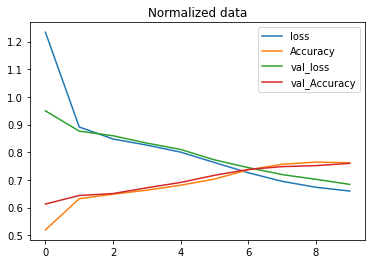

In [29]:
# Plot the loss curve
import pandas as pd
pd.DataFrame(history.history).plot(title = 'Normalized data')

### LearningRateScheduler
Get the best learning rate with `LearningRateScheduler` in Tensorflow.
`tf.keras.callbacks.LearningRateScheduler(schedule, verbose=0)`
At the beginning of every epoch, this callback gets the updated learning rate value from schedule function provided at __init__, with the current epoch and current learning rate, and applies the updated learning rate on the optimizer.


In [30]:
# Set the random seed
tf.random.set_seed(13)

# Build the model
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') 
])

# Compile the Model
model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['Accuracy'])

# With each epoch it will increase the value of lr
callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history = model4.fit(train_data, train_labels, epochs=40, validation_data=(test_data, test_labels),callbacks=[callback], verbose=0)

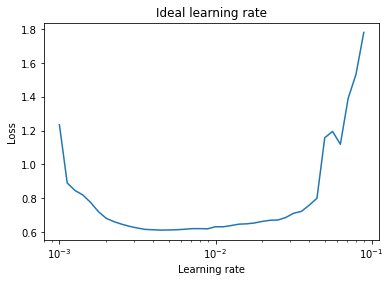

In [31]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Ideal learning rate");

We can see from the plot that somewhere 1e-3 is our ideal learning rate as the loss falls abruptly, this is also the defaluit lr of `Adam()` optimizer. So let's keep the lr parameter to `0.001` and train our model

### Early Stopping
`tf.keras.callbacks.EarlyStopping` will stop training when a monitored metric has stopped improving.




In [32]:
# Set the random seed
tf.random.set_seed(13)

# Build the model
model5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') 
])

# Compile the Model
model5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['Accuracy'])

# Early Stopping
# This callback will stop the training when there is no improvement in the loss for three consecutive epochs.

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Fit the Model
history = model5.fit(train_data, train_labels, epochs=100, validation_data=(test_data, test_labels), callbacks=[callback], verbose=0)

As you can see the training has stopped as soon as there is no improvement in `val_loss` for three consecutive epochs. You can also try with `loss` and see the changes

In [33]:
y_pred = model5.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [34]:
y_pred[0].argmax(),  class_name[y_pred[0].argmax()]

(9, 'Ankle boot')

In [35]:
# Convert all of the predictions from probabilities to labels
y_preds = y_pred.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 4, 1, 1, 2, 1, 2, 6, 5, 7])

In [36]:
# Check out the non-prettified confusion matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[806,   3,  43,  62,   2,   1,  74,   0,   9,   0],
       [  4, 946,   9,  35,   4,   0,   2,   0,   0,   0],
       [ 26,   5, 733,  12, 124,   0,  97,   0,   3,   0],
       [ 57,  23,  39, 811,  34,   3,  31,   0,   2,   0],
       [  1,   4, 214,  27, 694,   0,  54,   0,   6,   0],
       [  0,   0,   0,  11,   0, 877,   0,  53,  12,  47],
       [206,   3, 205,  41, 116,   0, 420,   0,   9,   0],
       [  0,   0,   0,   0,   0,  35,   0, 928,   0,  37],
       [  1,   1,   2,  10,   9,  27,  69,   5, 876,   0],
       [  0,   0,   0,   2,   0,  29,   1,  41,   0, 927]])

In [37]:
import itertools
def custom_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
  '''
    Creates a custom confusion matrix by comparing prediction and groud truth.
    If classes are not passed then it will take integer value

    Args:
    ================
    y_true: Array of True labels(shape should be same as y_pred)
    y_pred: Array of Predicted labels(shape should be same as y_true)
    classes: Array of class labels, default will be integer
    figsize: Size of output fig
    text_size: Size of output fig text(default 15)
  '''
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with
  #print(n_classes)

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Reds) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # If there is a list of class
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.
  
  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

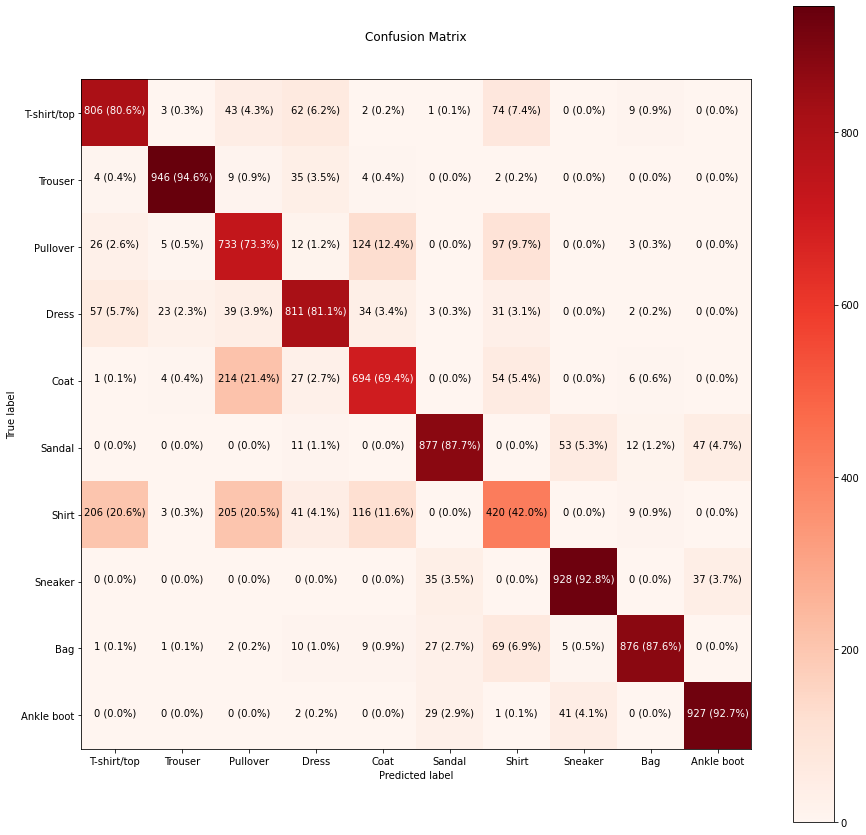

In [38]:
custom_confusion_matrix(
    y_true=test_labels,
    y_pred=y_preds,
    classes=class_name,
    figsize=(15,15),
    text_size=10
)

From the confusion matrix we can see that  our Model is getting confused between `Shirt` and `T-shirt/top`.

#### Happy Learning !!
You can connect and follow me @
  * [LinkedIn](https://www.linkedin.com/in/priya-singh1803)
  * [Github](https://github.com/piyu18/)
  * [Medium](https://medium.com/@priya1803)
